### 1. Any distribution

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# change the max. print value
np.set_printoptions(threshold=1000000, suppress=True)

def logistic(X):
    return (1 + np.tanh(X))/2
def sigmoid(x):
    return 1. / (1. + np.exp(-x))
def pointfunction(X):
    return (0.5*logistic(X+2)+0.5*logistic(2*X-3))
# def pointfunction(X):
#     return logistic(X)

def pointslope(m,bias,X):  
    return (2**m) * X + bias

def intercept(X):
    return pointfunction(X)-pointslope(m,bias,X)

# R=Right L=left W=Width N=Number
L, R = -10, 10
W = R - L
N = W * 100
X1 = np.linspace(L, R, N)

In [2]:
# d=differential
d1= np.gradient(pointfunction(X1))
d2= np.gradient(np.gradient(pointfunction(X1)))

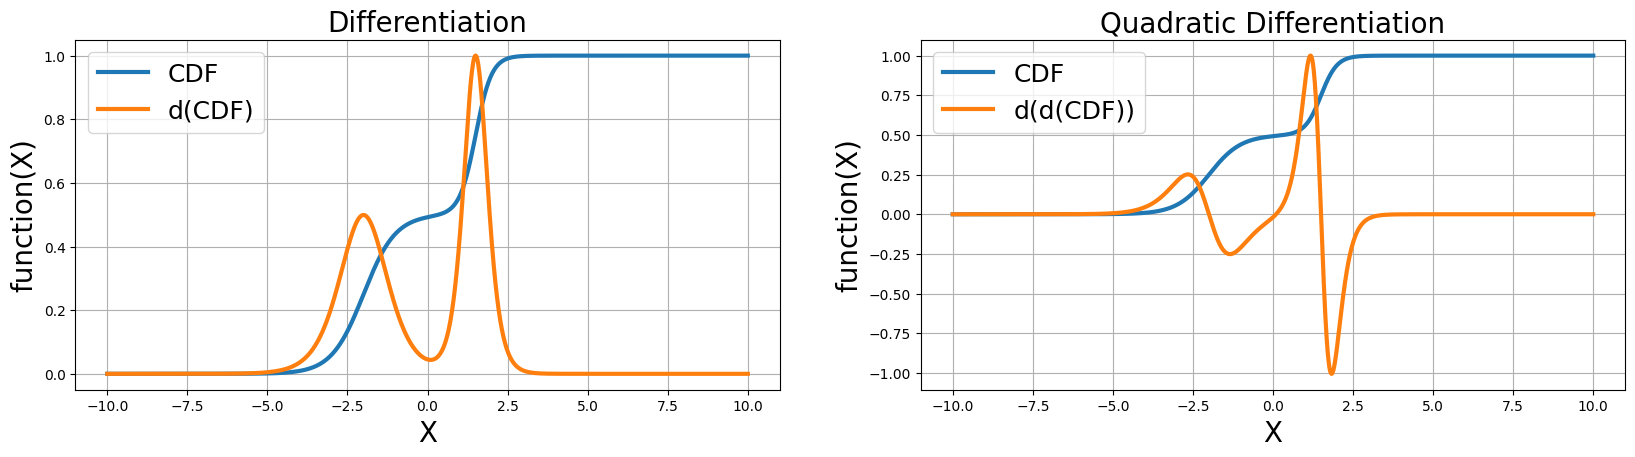

In [29]:
f1 = plt.figure(figsize=(20,10))
ax1 = f1.add_subplot(221)
ax1.plot(X1,pointfunction(X1),linewidth=3,label='CDF')
ax1.plot(X1,d1/np.max(d1),linewidth=3,label='d(CDF)')
plt.title("Differentiation",fontsize=20)
plt.ylabel("function(X)",fontsize=20)
plt.xlabel("X",fontsize=20)
plt.legend(fontsize=18)
plt.grid(True)

ax2 = f1.add_subplot(222)
ax2.plot(X1,pointfunction(X1),linewidth=3,label='CDF')
ax2.plot(X1,d2/np.max(d2),linewidth=3,label='d(d(CDF))')
plt.title("Quadratic Differentiation",fontsize=20)
plt.ylabel("function(X)",fontsize=20)
plt.xlabel("X",fontsize=20)
plt.legend(fontsize=18)
plt.grid(True)

### 2. Decide boundaries

In [19]:
# ep=endpoint
eps_d2 = np.where(np.diff(np.sign(np.diff(d2))))[0]

In [20]:
# Not used, finding the d1 boundary doesn't improve the overall.
# tolerance error = 10**(-5)
# d1_te = np.where(abs(d1) > 10**-(5), d1 , 0)
# d1_L_b = (d1_te!=0).argmax(axis=0)
# d1_R_b = len(d1_te)-(d1_te[::-1]!=0).argmax(axis=0)
# d1_b = np.array([d1_L_b, d1_R_b])
# All_b = np.sort(np.concatenate((boundary, d1_b, eps_d2)))
# All_b = np.sort(np.concatenate((boundary, eps_d2)))
# All_b = L+(All_b*W)/N

In [21]:
boundary = np.append([0],[N])
All_b = np.sort(np.concatenate((boundary, eps_d2)))
# Change index to value.
All_b = L+(All_b*W)/N

In [22]:
# Not used, just looking for boundaries.
infls_d2 = np.where(np.diff(np.sign(d2)))[0]
infls_d2 = L+((infls_d2+1)*W)/N

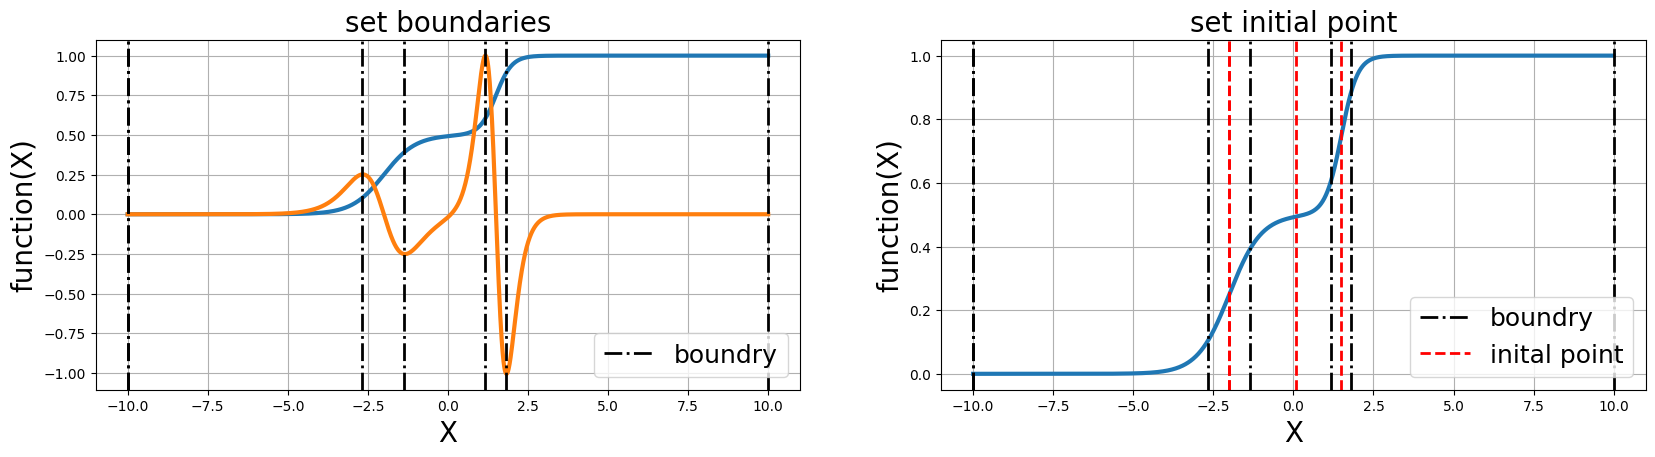

In [36]:
# setting figsize
f1 = plt.figure(figsize=(20,10))
ax1 = f1.add_subplot(221)
ax1.plot(X1,pointfunction(X1),linewidth=3)
ax1.plot(X1,d2/np.max(d2),linewidth=3)
for i, j in enumerate(All_b, 1):
    plt.axvline(x = j, color='black', linestyle="-.",linewidth=2)
    
plt.axvline(x = All_b[0], color='black', linestyle="-.",linewidth=2,label='boundry')
plt.legend(fontsize=18)

plt.title("set boundaries",fontsize=20) 
plt.ylabel("function(X)",fontsize=20)
plt.xlabel("X",fontsize=20)
plt.grid(True)

ax2 = f1.add_subplot(222)
ax2.plot(X1,pointfunction(X1),linewidth=3)
# ax2.plot(X1,d1/np.max(d1),linewidth=3)
for i, j in enumerate(All_b, 1):
    plt.axvline(x = j, color='black', linestyle="-.",linewidth=2)
for i, j in enumerate(infls_d2, 1):
    plt.axvline(x = j, color='red', linestyle="--",linewidth=2)
    
plt.axvline(x = All_b[0], color='black', linestyle="-.",linewidth=2,label='boundry')    
plt.axvline(x = infls_d2[0], color='red', linestyle="--",linewidth=2,label='inital point')   
plt.legend(fontsize=18)

plt.title("set initial point",fontsize=20)
plt.ylabel("function(X)",fontsize=20)
plt.xlabel("X",fontsize=20)
plt.grid(True)
plt.show()

### 3. Train SPINDLE

In [50]:
##### p = precision, n(nR,nL) = new, m = slpoe, c = center
# ans = approximate solution
# list1 = temp list 1. and so on. ev = error value
# for range of area, ud=undo

p = 0.001
ans = []
area = 0
error_rate = 0.003

for i in range(len(All_b)-1):
    list1, list2, list3, ud_area = [], [], [], []
    area += 1
    list2_ev = 1
    bL = All_b[i]
    bR = All_b[i+1]
    nL = bL
    nR = bR
    ud_area.append([bL,bR])
    print("------------------------------")
    print("|",'Area:',area,'Range:',round(bL,4),'~',round(bR,4),"|")
    print("------------------------------")
    
    while len(ud_area) != 0:
        ud_area.pop(0)
#         print("*Remaining range:")
#         print(np.around(ud_area,4))
#         print("*now do: ",round(nL,4),"~",round(nR,4))
        while list2_ev > error_rate:
            list1, list2= [], []
            for j in range(-8,3):
                m = j
                c = (nL+nR)/2
                bias = pointfunction(c)-2**m*(c)
                X = np.arange(nL, nR + p, p)
                err_L = abs(pointfunction(min(X)) - (2**m)*min(X)-bias)
                err_R = abs((2**m)*max(X)+bias - pointfunction(max(X)))
                err = (err_L + err_R)/2
                list1.append([err,m,c,bias,nL,nR])
                list1.sort(key = lambda s:s[0])
              
            list2 = np.array(list1)[0]
#             print("output the smallest array: ", list2)
            list2_ev =list2[0]
            # Python has approximation errors in subtraction.
            distance = round(c-nL,6)
            nL= nL + distance/2
            nR= nR - distance/2
            
        ans.append(list1[0][1:])
        ans.sort(key = lambda s:s[3])
        print("######")
        print("ans: ")
        print(np.around(ans,4))
        
        if bL == nL-distance/2:
            pass
        else:
            list3=[]
            list2_ev = 1
            list3.append([bL,nL-distance/2])
            list3.append([nR+distance/2,bR])
        
            list3.sort(key = lambda s:s[0])
            ud_area += list3
#             print("*undo_Array:")
#             print(np.around(ud_area,4))
            
        if len(ud_area) == 0:
            pass
        else:
            list2_ev = 1
            nL = ud_area[0][0]
            nR = ud_area[0][1]
            bL = nL
            bR = nR

------------------------------
| Area: 1 Range: -10.0 ~ -2.67 |
------------------------------
######
ans: 
[[-8.     -6.335   0.0248 -6.7931 -5.8769]]
######
ans: 
[[-8.     -8.3966  0.0328 -8.7974 -7.9957]
 [-8.     -6.335   0.0248 -6.7931 -5.8769]]
######
ans: 
[[-8.     -8.3966  0.0328 -8.7974 -7.9957]
 [-8.     -6.335   0.0248 -6.7931 -5.8769]
 [-6.     -4.2734  0.072  -4.6743 -3.8726]]
######
ans: 
[[ -8.      -9.3987   0.0367 -10.      -8.7974]
 [ -8.      -8.3966   0.0328  -8.7974  -7.9957]
 [ -8.      -6.335    0.0248  -6.7931  -5.8769]
 [ -6.      -4.2734   0.072   -4.6743  -3.8726]]
######
ans: 
[[ -8.      -9.3987   0.0367 -10.      -8.7974]
 [ -8.      -8.3966   0.0328  -8.7974  -7.9957]
 [ -8.      -7.3944   0.0289  -7.9957  -6.7931]
 [ -8.      -6.335    0.0248  -6.7931  -5.8769]
 [ -6.      -4.2734   0.072   -4.6743  -3.8726]]
######
ans: 
[[ -8.      -9.3987   0.0367 -10.      -8.7974]
 [ -8.      -8.3966   0.0328  -8.7974  -7.9957]
 [ -8.      -7.3944   0.0289  -7.995

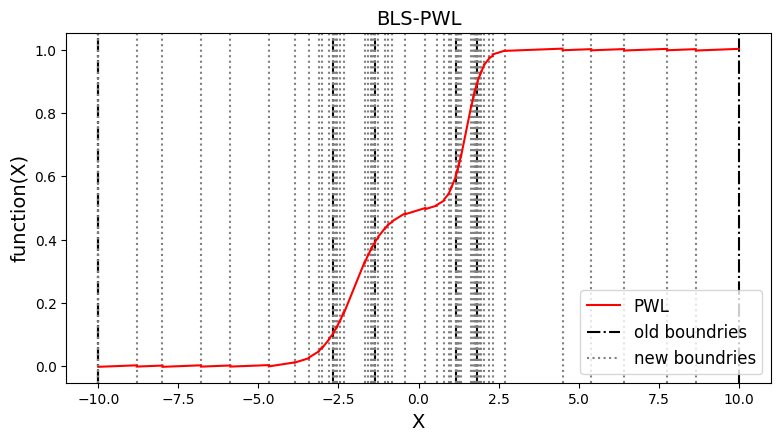

In [51]:
# setting figsize
f1 = plt.figure(figsize=(20,10))
ax1 = f1.add_subplot(221)

# print boundary
for i, j in enumerate(All_b, 1):
    plt.axvline(x = j, color='black', linestyle="-.")
for i in range(len(ans)):
    L = ans[i][3]
    plt.axvline(x = L, color='gray', linestyle=":")
# print the slope intercept
for i in range(len(ans)):
    nL = ans[i][3]
    nR = ans[i][4]
    m = ans[i][0]
    bias = ans[i][2]
    X = np.arange(nL, nR + p, p)
    Y = (2**m)*X + bias
    ax1.plot(X , Y,color = 'red')
ax1.plot(0,0,color = 'red',label='PWL')
plt.axvline(x = -10, color='black', linestyle="-.",label='old boundries')
plt.axvline(x = -10, color='gray', linestyle=":",label='new boundries')
plt.legend(fontsize=12)
# print pointfunction
# ax1.plot(X1,pointfunction(X1),linestyle="--")
plt.title("BLS-PWL",fontsize=14)
plt.ylabel("function(X)",fontsize=14)
plt.xlabel("X",fontsize=14)
plt.grid(False)

In [52]:
# statistics
print("total PWL: ",len(ans))
print("All Required ReLU: ", 2*len(ans)-1)

total PWL:  57
All Required ReLU:  113
